In [13]:
import random
import warnings
import numpy as np
import matplotlib.pyplot as plt
import dataLoader as dl

#from Inner_Speech_Dataset.Plotting.ERPs import 
from Inner_Speech_Dataset.Python_Processing.Data_extractions import  Extract_data_from_subject
from Inner_Speech_Dataset.Python_Processing.Data_processing import  Select_time_window, Transform_for_classificator, Split_trial_in_time
from Inner_Speech_Dataset.Python_Processing.Data_processing import  Calculate_power_windowed
from Inner_Speech_Dataset.Python_Processing.Utilitys import picks_from_channels


In [14]:
#Loading the data and labels from EEG and EXG
sampling_rate = 64
data1, labels1 = dl.load_data(datatype="EEG", subject_nr=1, verbose=True,sampling_rate=sampling_rate) 
data2, labels2 = dl.load_data(datatype="EEG", subject_nr=2 ,verbose=True,sampling_rate=sampling_rate 
data4 , labels4 = dl.load_data(datatype="EEG", subject_nr=4, verbose=True,sampling_rate=sampling_rate) 

dataX, labelsX = dl.load_data(datatype="EXG", verbose=False) 
#datab, labelsb = dl.load_data(datatype="baseline", verbose=False, sampling_rate=32) 
#dl.load_data(datatype2=2) #4.5 is max

data = np.concatenate([data1, data2, data4], axis = 0)
labels1d = np.concatenate([labels1, labels2, labels4], axis = 0)
#data = data1
#labels1d = labels1
labels = np.zeros([labels1d.shape[0], 2])
for row, label in enumerate(labels1d,0):
    if label == 0:
        labels[row,0] = 1
    if label == 1:
        labels[row,1] = 1

Data shape: [trials x channels x samples]
(500, 128, 320)
Labels shape
(500, 4)
Final data shape
(100, 128, 320)
Final labels shape
(100,)
Up is 0.0 and Down is 1.0
Data shape: [trials x channels x samples]
(600, 128, 320)
Labels shape
(600, 4)
Final data shape
(120, 128, 320)
Final labels shape
(120,)
Up is 0.0 and Down is 1.0
Data shape: [trials x channels x samples]
(600, 128, 320)
Labels shape
(600, 4)
Final data shape
(120, 128, 320)
Final labels shape
(120,)
Up is 0.0 and Down is 1.0
Up is 0.0 and Down is 1.0


In [15]:
#Channel name array

def arrToDict(arr):
    dict = {}
    for row in arr:
        dict[row[0]] = row[1]
    
    return dict

def get_channelNames():
    ch_names = np.array(dl.get_channelnames())
    nr = np.arange(ch_names.shape[0])
    ch_names = np.array([ch_names, nr]).T
    ch_names = arrToDict(ch_names)
    return ch_names


ch_names = get_channelNames()


In [16]:
a = picks_from_channels("OPZ")


def only_spec_channel_data(data , picks):
    
    channel_names_string = picks_from_channels(picks)
    ch_names = get_channelNames()
    channel_nr = []
    for name in  channel_names_string:
        channel_nr.append(int(ch_names[name]))
        print(ch_names[name])

    channel_nr = np.array(channel_nr)
    
    print(channel_nr)
    #data = np.swapaxes(data, 0, 1)
    #labels = np.swapaxes(labels, 0, 1)
    #for channelnrs in channels:
    data2 = np.delete(data, np.delete(np.arange(128), channel_nr) , axis=1)
    return data2

data = only_spec_channel_data(data, "OPZ")
print(data.shape)


16
29
19
20
21
[16 29 19 20 21]
(340, 5, 320)


In [17]:

def get_power_array(split_data ,trialSplit = 2, samplingRate=32):

    #trialSplit = 16
    sR = samplingRate #samplingRate = 32
    data_power = np.zeros([split_data.shape[0], split_data.shape[1], trialSplit, 2])
    for t, trial in enumerate(split_data,0):
        for c, channel in enumerate(trial,0):
            for x in range(trialSplit):
                data_power[t, c, x, : ] = Calculate_power_windowed(channel, fc=sR, window_len=1*4/trialSplit, window_step=1*4/trialSplit, t_min=0, t_max=4/trialSplit * x + 4/trialSplit)
    

    #m_power , std_power
    print(data_power.shape)
    return data_power
    
data_p =  get_power_array(data)
print(data_p.shape)

(340, 5, 2, 2)
(340, 5, 2, 2)


In [18]:
#Splitting into training and test data
#print(labels)


order = np.arange(labels.shape[0])
np.random.shuffle(order)

temp_data = np.zeros(data.shape)
temp_labels = np.zeros(labels.shape)

for x in range(labels.shape[0]):
    i = order[x]
    
    temp_data[x] = data[i]
    temp_labels[x] = labels[i]

data = temp_data
labels = temp_labels

data_train, data_test = np.split(data, indices_or_sections=[int(labels.shape[0]*0.75)],axis=0)
labels_train, labels_test = np.split(labels, indices_or_sections=[int(labels.shape[0]*0.75)],axis=0)
print(labels_train.shape)
print(data_test.shape)




(255, 2)
(85, 5, 320)


In [19]:
#Convolution part

# Do the convs like I wrote in the Note
# First need to find out 8 best channels
#  Utilities can help average similar channels
# Read through article and how they did it better!
# convlayer = tf.keras.layers.Conv2D(4,
#  kernel_size=[2,1], input_shape= (data_train.shape[0], data_train.shape[1] , data_train.shape[2], 1,), 
#  padding="valid", strides=[round(data_train.shape[1]),1],
#  activation="relu")


# print(data_train.shape)
# print(data_test.shape)

# #data_train = np.swapaxes(data_train, 2, 1)
# #data_test = np.swapaxes(data_test, 2, 1)
# print(data_train.shape)
# print(data_test.shape)
# data_train = np.expand_dims(data_train, axis=0)
# data_test = np.expand_dims(data_test, axis=0)
# data_train = np.moveaxis(data_train, 0, -1)
# data_test = np.moveaxis(data_test, 0, -1)

# conv_data_train = convlayer(data_train)
# conv_data_test = convlayer(data_test)

# data_train = conv_data_train
# data_test = conv_data_test

# #data_train = np.swapaxes(data_train, 2, 1)
# #data_test = np.swapaxes(data_test, 2, 1)


# data_train = np.squeeze(np.moveaxis(data_train, -1, 0))
# data_test = np.squeeze(np.moveaxis(data_test, -1, 0))
# print(data_train.shape)
# print(data_test.shape)

In [20]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()





eeg_model = tf.keras.Sequential([
    layers.Dense(input_shape = (data_train.shape[1],data_train.shape[2]), units=5*160, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=5*160, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=10*160, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=40*160, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=20*160, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=10*160, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=5*160, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=1*160, activation="relu"),
    layers.Dropout(0.2),
    layers.Flatten(input_shape = (5,160)),
    layers.Dense(units=2, activation="softmax")


])
eeg_model.build()
eeg_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5, 800)            256800    
                                                                 
 dropout (Dropout)           (None, 5, 800)            0         
                                                                 
 dense_1 (Dense)             (None, 5, 3200)           2563200   
                                                                 
 dropout_1 (Dropout)         (None, 5, 3200)           0         
                                                                 
 dense_2 (Dense)             (None, 5, 1600)           5121600   
                                                                 
 dropout_2 (Dropout)         (None, 5, 1600)           0         
                                                                 
 dense_3 (Dense)             (None, 5, 800)            1

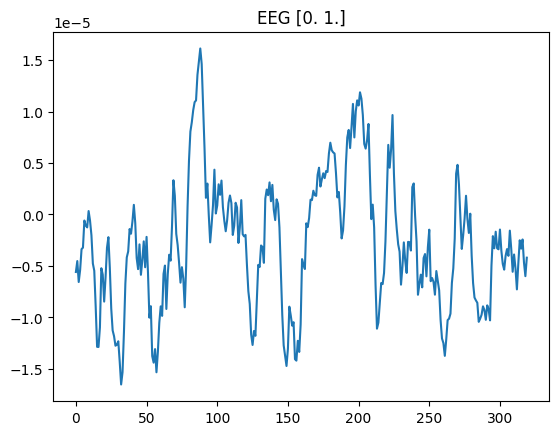

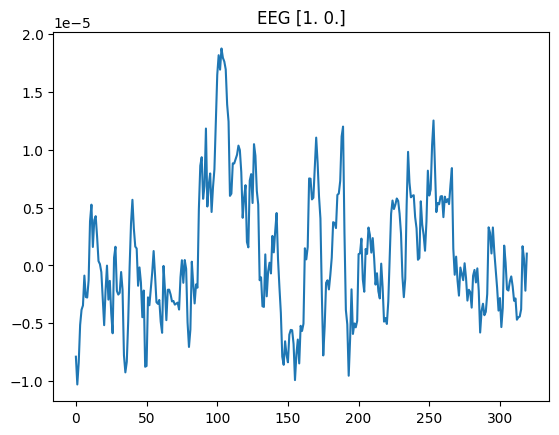

In [21]:
for trialNr, trial in enumerate(data_train[44:46],1):
    for channel in trial[1:2]:
        plt.figure()
        plt.plot(channel)
        plt.title("EEG {}".format(labels_train[trialNr]))

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=25, )

eeg_model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

eeg_model.fit(data_train, labels_train, callbacks=[callback],epochs=100, )

print("Results")
eeg_model.evaluate(data_test, labels_test)
result = eeg_model.predict(data_test)


Epoch 1/100
8/8 [==============================] - 2s 88ms/step - loss: 0.6941 - accuracy: 0.4667
Epoch 2/100
8/8 [==============================] - 1s 80ms/step - loss: 0.6941 - accuracy: 0.5059
Epoch 3/100
8/8 [==============================] - 1s 88ms/step - loss: 0.6929 - accuracy: 0.5294
Epoch 4/100
8/8 [==============================] - 1s 78ms/step - loss: 0.6942 - accuracy: 0.4667
Epoch 5/100
8/8 [==============================] - 1s 77ms/step - loss: 0.6939 - accuracy: 0.4627
Epoch 6/100
8/8 [==============================] - 1s 95ms/step - loss: 0.6925 - accuracy: 0.5294
Epoch 7/100
8/8 [==============================] - 1s 79ms/step - loss: 0.6946 - accuracy: 0.5059
Epoch 8/100
8/8 [==============================] - 1s 88ms/step - loss: 0.6931 - accuracy: 0.5020
Epoch 9/100
8/8 [==============================] - 1s 87ms/step - loss: 0.6936 - accuracy: 0.5059
Epoch 10/100
8/8 [==============================] - 1s 80ms/step - loss: 0.6944 - accuracy: 0.4471
Epoch 11/100
8/8 [=

In [23]:
result2 = []
print(result)
for res in result:
    x = np.maximum(res[0], res[1])
    result2.append(int(np.where(res == x)[0]))

result2 = np.array(result2)
print(result2)

[[0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.49002662 0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.49002662 0.50997335]
 [0.49002662 0.50997335]
 [0.49002662 0.50997335]
 [0.49002662 0.50997335]
 [0.4900266  0.50997335]
 [0.49002662 0.50997335]
 [0.49002662 0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.49002662 0.50997335]
 [0.4900266  0.50997335]
 [0.49002662 0.50997335]
 [0.49002662 0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.49002662 0.50997335]
 [0.49002662 0.50997335]
 [0.49002662 0.50997335]
 [0.49002662 0.50997335]
 [0.49002662 0.50997335]
 [0.49002662 0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.49002662 0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]
 [0.49002662 0.50997335]
 [0.4900266  0.50997335]
 [0.4900266  0.50997335]


In [24]:


for trialNr, trial in enumerate(data[44:46],44):
    for channel in trial[5:6]:
        plt.figure()
        plt.plot(channel)
        plt.title("EEG {}".format(labels[trialNr]))

      